In [1]:
# Install required packages
!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import classification_report
import optuna
from optuna.samplers import TPESampler
import pickle

In [3]:
# Read in datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_df = pd.read_csv('gender_submission.csv')

# Data Exploration

## Basic Analysis

Look at the first few rows, data types, summary statistics, and shape of the dataset.

#### Column Information:
    - PassengerId: A unique identifier assigned to each passenger.
    - Survived: Indicates whether the passenger survived or not. (0 = No, 1 = Yes)
    - Pclass: Represents the ticket class. (1 = 1st, 2 = 2nd, 3 = 3rd)
    - Name: Name of the passenger.
    - Sex: Gender of the passenger.
    - Age: Age of the passenger in years.
    - SibSp: Number of siblings or spouses aboard the Titanic.
    - Parch: Number of parents or children aboard the Titanic.
    - Ticket: Ticket number.
    - Fare: Fare paid for the ticket.
    - Cabin: Cabin number where the passenger stayed.
    - Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) where the passenger boarded the ship.
    

### Train Data

#### Data Head:

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Types:

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Summary Statistics:

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Dataset Shape:

In [7]:
train_df.shape

(891, 12)

### Test Data

#### Data Head:

In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Data Type:

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Summary Statistics:

In [10]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Dataset Shape:

In [11]:
test_df.shape

(418, 11)

### Gender Submission

#### Data Head:

In [12]:
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


#### Data Types:

In [13]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


#### Summary Statistics:

In [14]:
gender_df.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


#### Dataset Shape:

In [15]:
gender_df.shape

(418, 2)

### Missing Values

Dealing with missing values in a small dataset requires careful consideration to retain data integrity while handling the absence of information.

#### Identify Missing Values:

From the datasets' information the following columns are identified as having missing values:

<table>
  <tr>
    <th>Train</th>
    <th>% Missing</th>      
    <th>Test</th>
    <th>% Missing</th>
    <th>Gender Submission</th>
    <th>% Missing</th>
  </tr>
  <tr>
    <td>Age</td>
    <td>19.865</td>
    <td>Age</td>
    <td>20.574</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>Cabin</td>
    <td>77.104</td>
    <td>Fare</td>
    <td>0.239</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>Embarked</td>
    <td>0.224</td>
    <td>Cabin</td>
    <td>78.229</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
</table>


In [16]:
df_list = [train_df, test_df, gender_df]

for dataset in df_list:
    for feature in dataset.columns:
        if(len(dataset) != len(dataset[dataset[feature].notna()])):
            count = dataset[feature].isna().sum()
            percent = 100*count/len(dataset)
            print(f"{feature} - Missing Count: {count} - Missing %: {percent}")

Age - Missing Count: 177 - Missing %: 19.865319865319865
Cabin - Missing Count: 687 - Missing %: 77.10437710437711
Embarked - Missing Count: 2 - Missing %: 0.2244668911335578
Age - Missing Count: 86 - Missing %: 20.574162679425836
Fare - Missing Count: 1 - Missing %: 0.23923444976076555
Cabin - Missing Count: 327 - Missing %: 78.22966507177034


#### Understand the Reason for Missing Data:
Determine why the data is missing. It could be due to errors, non-response, or other reasons.

Age: Missing for about 20% of the passengers. Reasons could include data recording errors, passengers not providing their age, or certain age groups being less likely to have their age recorded.

Cabin: Missing for about 77% of the passengers. This could be due to various reasons such as incomplete records, some passengers not being assigned cabins, or the data not being collected properly.

Embarked: Missing for a very small percentage (less than 1%) of passengers. This could be due to oversight during data collection or missing records.

Fare: Missing for a very small percentage (less than 1%) of passengers. It might be due to data recording errors or omissions during data entry.

#### Remove Rows or Columns:
If the missing values are few and don’t significantly impact your analysis, deleting rows or columns with missing values can be an option. However, in a small dataset, losing data might not be ideal.

Proportion of Missing Values: If a large proportion of a feature's values are missing, especially over 50% or more, it might be considered for exclusion. In this dataset, the "Cabin" feature has around 77% missing values, which could be a candidate for exclusion.

In [17]:
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

#### Imputation:
Replace missing values with a statistic like the mean, median, mode, or a more sophisticated method (like regression imputation). Imputation helps to retain data while filling in the gaps.

Feature Importance: Consider the significance of the feature in predicting the target variable (survival in this case). Features like "Age" might be crucial in understanding survival patterns, and missing values might be imputed to retain its predictive power.

In [18]:
train_df['Age'] = train_df.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.mean()))
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

test_df['Age'] = test_df.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.mean()))
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

### Duplicate Values

In [19]:
print(f"train: {train_df.duplicated().sum()} \ntest: {test_df.duplicated().sum()}")

train: 0 
test: 0


## Exploritory Data Analysis

### Univariate Analysis

In [20]:
for i, df in enumerate(df_list):
    print(f"DataFrame {i+1} Summary:")
    print(df.describe())
    print("\n")

DataFrame 1 Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.736034    0.523008   
std     257.353842    0.486592    0.836071   13.014897    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   30.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


DataFrame 2 Summary:
       PassengerId      Pclass       

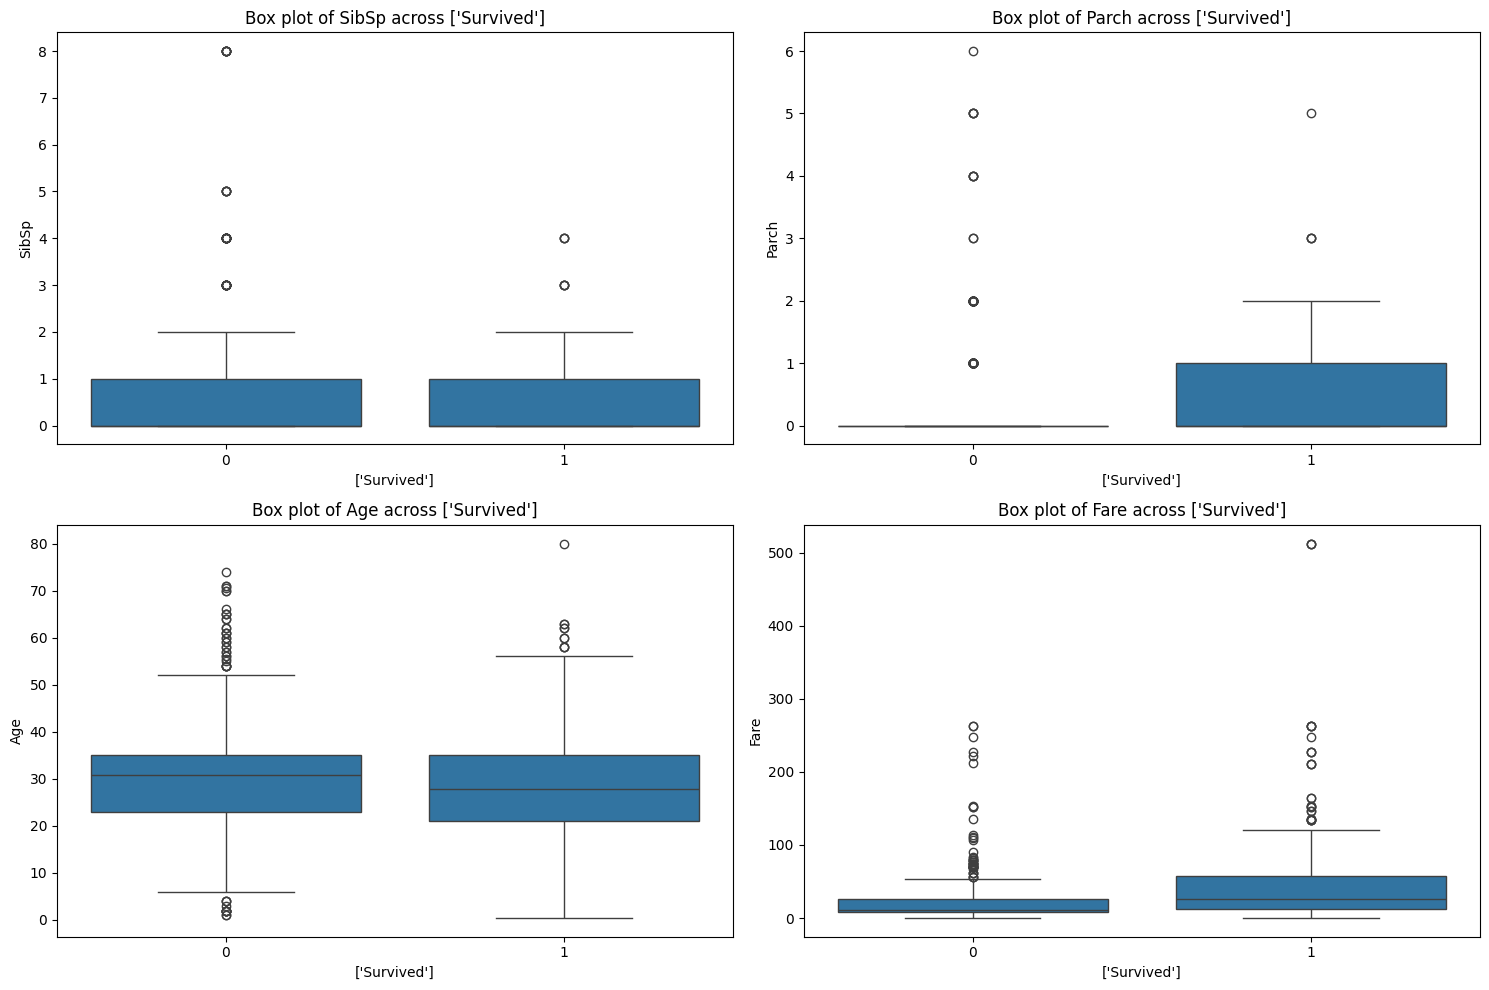

In [21]:
category = ['Survived']
variables = ['SibSp', 'Parch', 'Age', 'Fare']

# Create subplots for multiple box plots
fig, axes = plt.subplots(len(variables)//2, 2, figsize=(15, 10))

for i, variable in enumerate(variables):
    sns.boxplot(x=category[0], y=variable, data=train_df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Box plot of {variable} across {category}')
    axes[i//2, i%2].set_xlabel(category)
    axes[i//2, i%2].set_ylabel(variable)

plt.tight_layout()
plt.show()

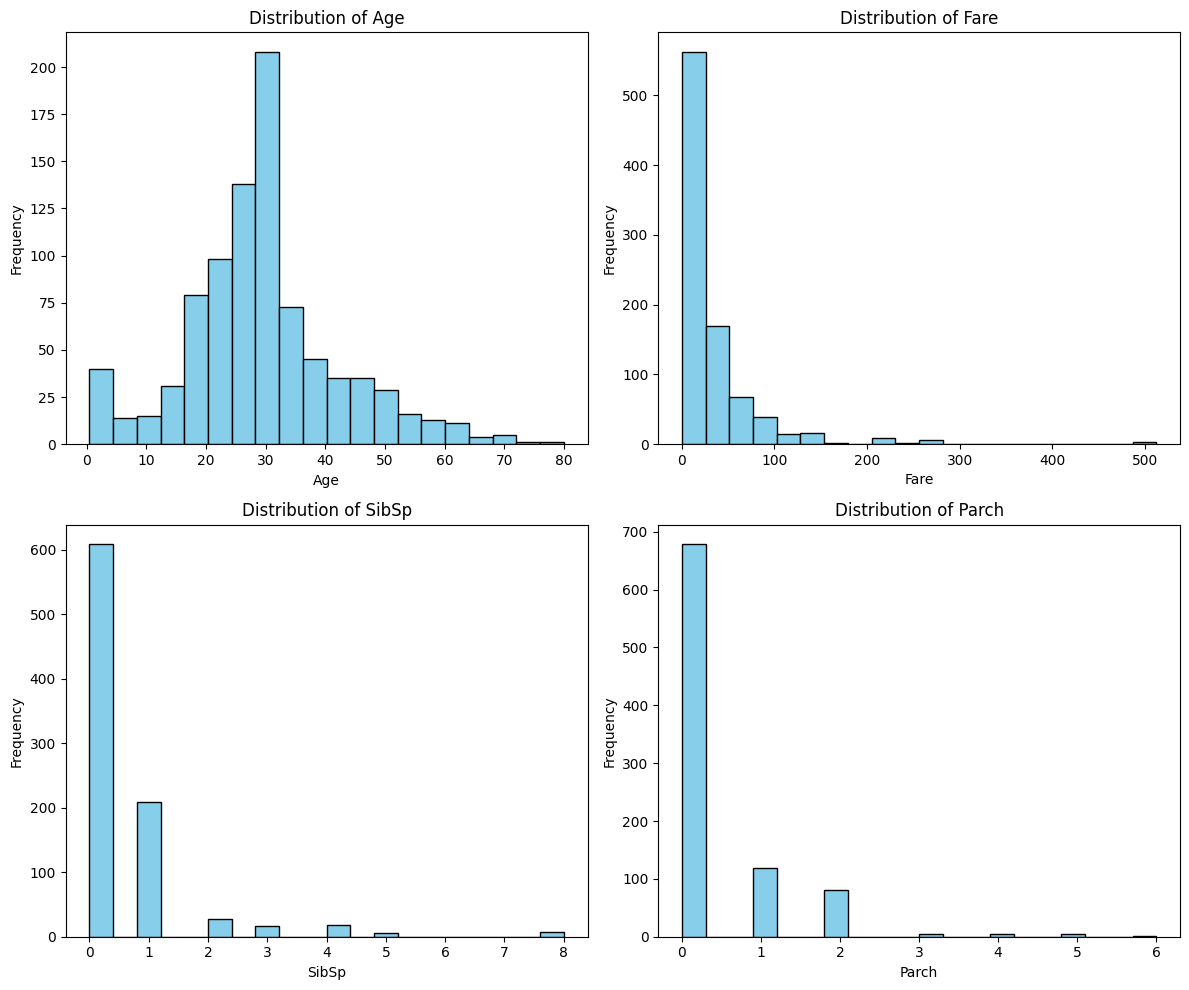

In [22]:
selected_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Creating subplots for histograms of selected features
num_cols = len(selected_features)
num_rows = (num_cols + 1) // 2  # Calculating the number of rows needed for subplots

plt.figure(figsize=(12, 10))

for i, feature in enumerate(selected_features):
    plt.subplot(num_rows, 2, i + 1)
    plt.hist(train_df[feature].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

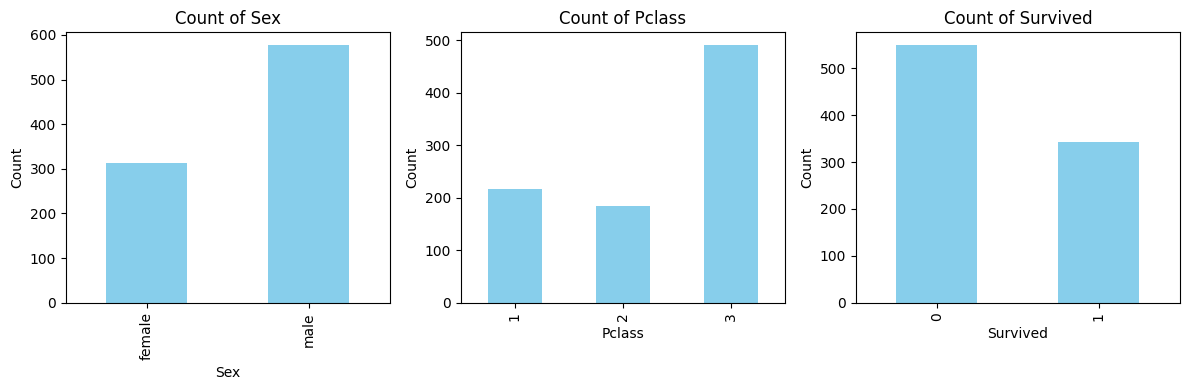

In [23]:
categorical_columns = ['Sex', 'Pclass', 'Survived']

# Create subplots for bar plots of categorical columns
num_cols = len(categorical_columns)

plt.figure(figsize=(12, 4))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, num_cols, i)
    train_df[column].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [24]:
categorical_columns = ['Sex', 'Pclass', 'Survived']

# Obtain value counts for each categorical column using a loop
for column in categorical_columns:
    counts = train_df[column].value_counts()
    print(f"Value counts for '{column}':")
    print(counts)
    print("\n")

Value counts for 'Sex':
Sex
male      577
female    314
Name: count, dtype: int64


Value counts for 'Pclass':
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Value counts for 'Survived':
Survived
0    549
1    342
Name: count, dtype: int64




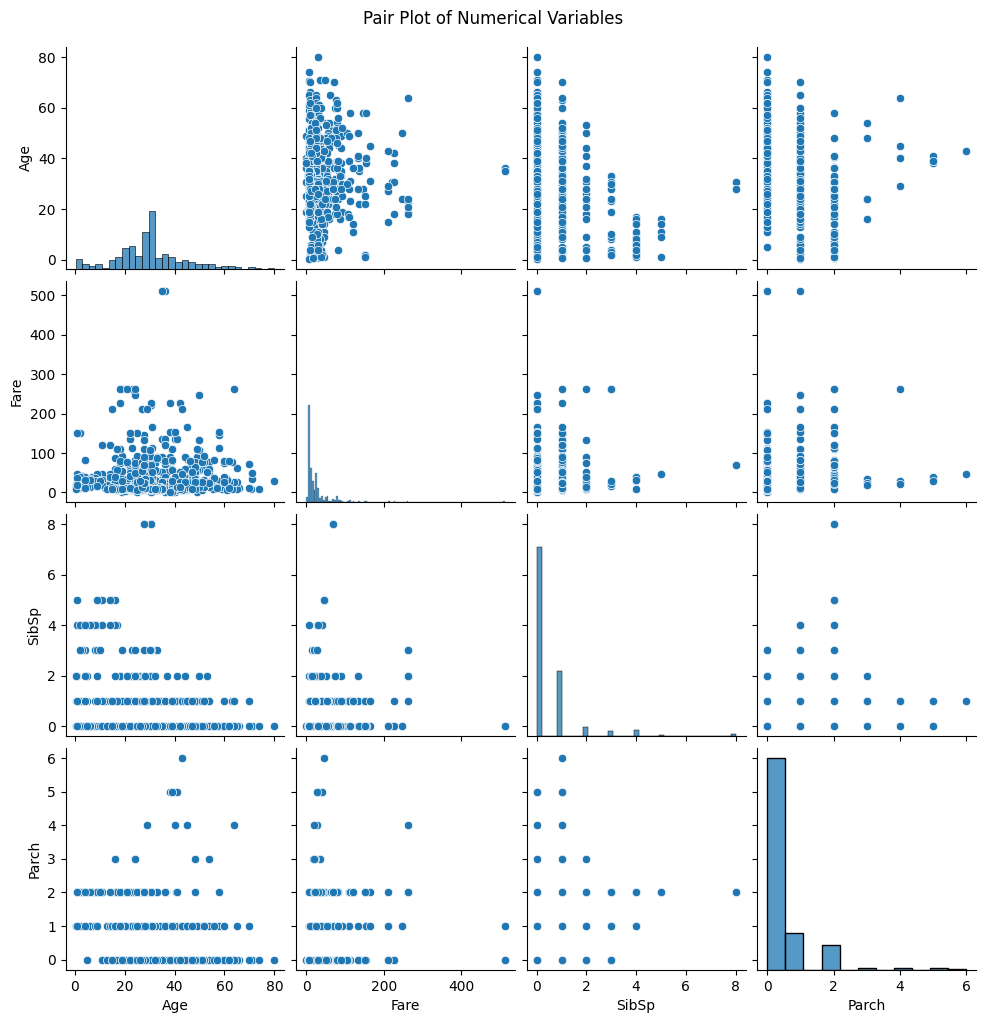

In [25]:
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']

# Creating pair plot
sns.pairplot(train_df[numerical_columns].dropna(), diag_kind='hist')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

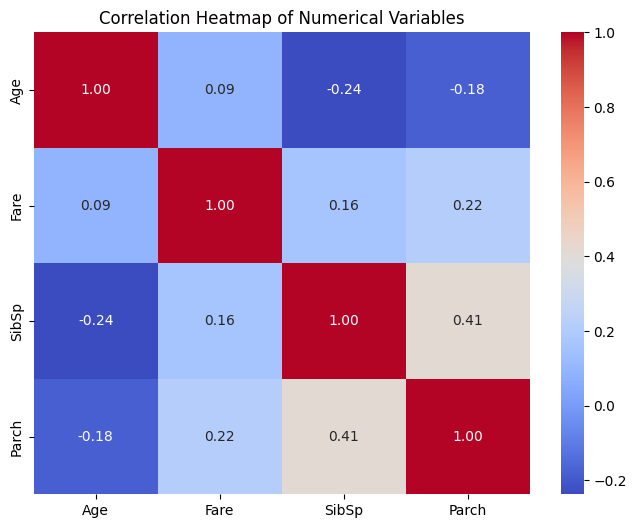

In [26]:
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']

# Creating a correlation matrix
correlation_matrix = train_df[numerical_columns].corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Feature Engineering

In [27]:
label_encoder = LabelEncoder()
train_df['Sex_LabelEncoded'] = label_encoder.fit_transform(train_df['Sex'])

one_hot_encoded = pd.get_dummies(train_df['Embarked'], prefix='Embarked')
train_df = pd.concat([train_df, one_hot_encoded.astype(int)], axis=1)

In [28]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_LabelEncoded,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,0,1


# Feature Selection

In [29]:
train_df.drop(['Name', 'Sex', 'PassengerId', 'Ticket', 'Embarked'], axis=1, inplace=True)

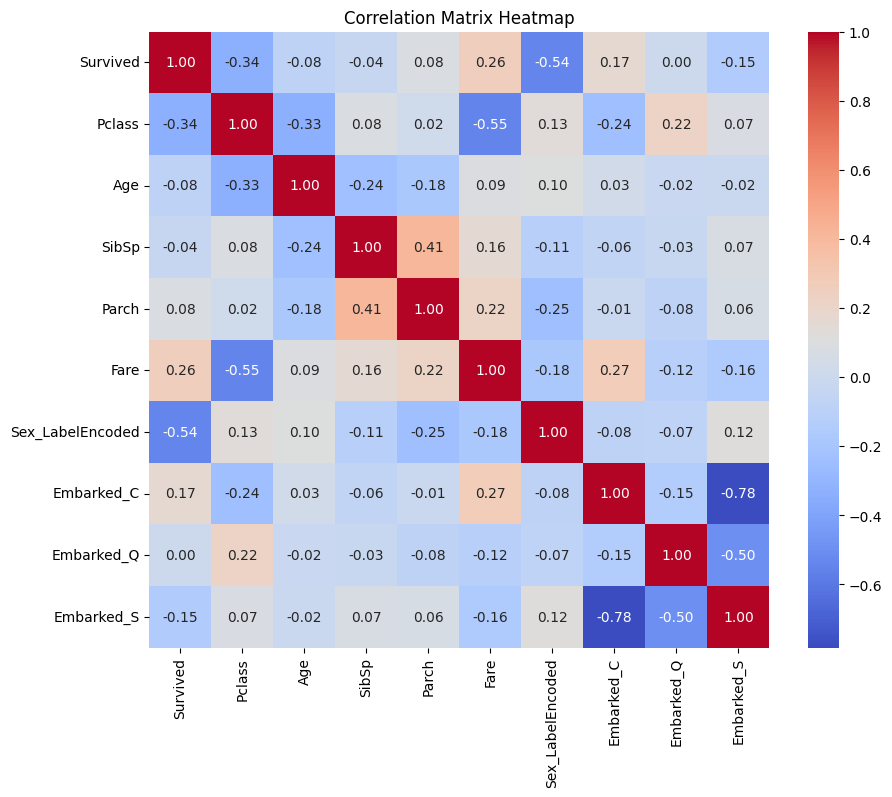

In [30]:
correlation_matrix = train_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Data Processing

### Data Scaling/Normalization

In [31]:
scaler = MinMaxScaler()

# Select numerical columns for normalization
numerical_columns = train_df.select_dtypes(include=['float64', 'int64'])

# Normalize the numerical columns
normalized_data = scaler.fit_transform(numerical_columns)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numerical_columns.columns)

### Data Split

In [32]:
X = normalized_df.drop('Survived', axis=1)
y = normalized_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Model Selection

In [33]:
names = ['Logistic Regression', 'Nearest Neighbors',
         'Linear SVM', 'RBF SVM',
         'Decision Tree', 'Random Forest', 'AdaBoost']

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier()
]

In [34]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred)
    recall    = metrics.recall_score(y_train, y_pred)

    f1        = metrics.f1_score(y_train, y_pred)
    f1_test   = metrics.f1_score(y_test, y_pred_test)

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting RBF SVM model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
... All done!


In [35]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Random Forest,0.973783,0.973422,0.957516,0.965404,0.739726,0.305023
Decision Tree,0.973783,0.986348,0.944444,0.964942,0.611111,0.004901
Nearest Neighbors,0.796504,0.760000,0.683007,0.719449,0.647059,0.002519
AdaBoost,0.774032,0.765957,0.588235,0.665434,0.696970,0.120320
RBF SVM,0.719101,0.681614,0.496732,0.574669,0.636364,0.034551
Linear SVM,0.695381,0.637168,0.470588,0.541353,0.626866,0.019466
Logistic Regression,0.704120,0.668293,0.447712,0.536204,0.646154,0.007373


In [36]:
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Random Forest,0.973783,0.973422,0.957516,0.965404,0.739726,0.305023
AdaBoost,0.774032,0.765957,0.588235,0.665434,0.696970,0.120320
Nearest Neighbors,0.796504,0.760000,0.683007,0.719449,0.647059,0.002519
Logistic Regression,0.704120,0.668293,0.447712,0.536204,0.646154,0.007373
RBF SVM,0.719101,0.681614,0.496732,0.574669,0.636364,0.034551
Linear SVM,0.695381,0.637168,0.470588,0.541353,0.626866,0.019466
Decision Tree,0.973783,0.986348,0.944444,0.964942,0.611111,0.004901


# Hyperparameter Tuning

In [37]:
def objective(trial):
    # Load your dataset and split it into training and validation sets
    # X_train, X_val, y_train, y_val = train_test_split(...)

    # Choose the classifier based on the trial suggestion
    classifier_name = trial.suggest_categorical('classifier', ['adaboost', 'random_forest', 'svm', 'knn', 'logreg'])

    if classifier_name == 'adaboost':
        model = AdaBoostClassifier(
            n_estimators=trial.suggest_int('n_estimators', 1, 200),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 1.0),
            random_state=trial.suggest_int('random_state', 42, 42)
        )
    elif classifier_name == 'random_forest':
        model = RandomForestClassifier(
            n_estimators=trial.suggest_int('n_estimators', 50, 200),
            criterion=trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
            max_depth=trial.suggest_int('max_depth', 2, 32, log=True),
            min_samples_split=trial.suggest_int('min_samples_split', 2, 100),
            min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 50),
            max_features=trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
            random_state=trial.suggest_int('random_state', 42, 42)
        )
    elif classifier_name == 'svm':
        model = SVC(
            C=trial.suggest_float('C', 0.1, 10.0, log=True),
            kernel=trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
            degree=trial.suggest_int('degree', 1, 10),
            gamma=trial.suggest_float('gamma', 0.01, 10),
            random_state=trial.suggest_int('random_state', 42, 42)
            
        )
    elif classifier_name == 'knn':
        model = KNeighborsClassifier(
#             n_neighbors=trial.suggest_int('n_neighbors', 2, 50),
#             weights=trial.suggest_categorical('weights', ['uniform', 'distance']),
#             random_state=trial.suggest_int('random_state', 42, 42)
        )
    elif classifier_name == 'logreg':
        model = LogisticRegression(
            C=trial.suggest_float('C', 0.1, 10.0, log=True),
            random_state=trial.suggest_int('random_state', 42, 42)
        )

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = model.predict(X_train)

    # Calculate F1 score
    f1 = f1_score(y_train, y_pred)

    return f1

In [38]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=2000)

best_hyperparameters = {}

# Iterate over trials and update best hyperparameters for each classifier
for trial in study.trials:
    classifier_name = trial.params['classifier']
    if classifier_name not in best_hyperparameters or trial.value > best_hyperparameters[classifier_name]['f1_score']:
        best_hyperparameters[classifier_name] = {
            'f1_score': trial.value,
            'hyperparameters': {key: trial.params[key] for key in trial.params if key != 'classifier'}
        }

# Print the best hyperparameters for each classifier
print('Best Hyperparameters for Each Classifier:')
for classifier_name, info in best_hyperparameters.items():
    print(f"\nClassifier: {classifier_name}")
    print(f"F1 Score: {info['f1_score']}")
    print("Hyperparameters:")
    for key, value in info['hyperparameters'].items():
        print(f"  {key}: {value}")

[I 2024-01-23 17:31:11,979] A new study created in memory with name: no-name-a44cf0a2-aa0f-4fad-8ad7-4050402056b1
[I 2024-01-23 17:31:12,335] Trial 0 finished with value: 0.6835443037974683 and parameters: {'classifier': 'adaboost', 'n_estimators': 63, 'learning_rate': 0.9850179037403116, 'random_state': 42}. Best is trial 0 with value: 0.6835443037974683.
[I 2024-01-23 17:31:12,499] Trial 1 finished with value: 0.5659655831739961 and parameters: {'classifier': 'random_forest', 'n_estimators': 69, 'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 66, 'min_samples_leaf': 35, 'max_features': 'log2', 'random_state': 42}. Best is trial 0 with value: 0.6835443037974683.
[I 2024-01-23 17:31:12,521] Trial 2 finished with value: 0.5138339920948617 and parameters: {'classifier': 'logreg', 'C': 0.13854236211616813, 'random_state': 42}. Best is trial 0 with value: 0.6835443037974683.
[I 2024-01-23 17:31:12,694] Trial 3 finished with value: 0.42396313364055294 and parameters: {'classifier'

[I 2024-01-23 17:31:19,309] Trial 34 finished with value: 0.6490566037735849 and parameters: {'classifier': 'random_forest', 'n_estimators': 93, 'criterion': 'log_loss', 'max_depth': 17, 'min_samples_split': 21, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 31 with value: 0.9652892561983473.
[I 2024-01-23 17:31:19,730] Trial 35 finished with value: 0.6813186813186813 and parameters: {'classifier': 'random_forest', 'n_estimators': 143, 'criterion': 'log_loss', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 31 with value: 0.9652892561983473.
[I 2024-01-23 17:31:20,256] Trial 36 finished with value: 0.736842105263158 and parameters: {'classifier': 'random_forest', 'n_estimators': 141, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 14, 'min_samples_leaf': 7, 'max_features': None, 'random_state': 42}. Best is trial 31 with value: 0.9652892561983473.
[I 2024-01-23 

[I 2024-01-23 17:31:28,744] Trial 61 finished with value: 0.7670753064798599 and parameters: {'classifier': 'random_forest', 'n_estimators': 124, 'criterion': 'entropy', 'max_depth': 28, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 31 with value: 0.9652892561983473.
[I 2024-01-23 17:31:29,184] Trial 62 finished with value: 0.847457627118644 and parameters: {'classifier': 'random_forest', 'n_estimators': 122, 'criterion': 'entropy', 'max_depth': 32, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 31 with value: 0.9652892561983473.
[I 2024-01-23 17:31:29,220] Trial 63 finished with value: 0.531496062992126 and parameters: {'classifier': 'logreg', 'C': 2.4003863029381054, 'random_state': 42}. Best is trial 31 with value: 0.9652892561983473.
[I 2024-01-23 17:31:29,609] Trial 64 finished with value: 0.7526501766784452 and parameters: {'classifier': 'random_forest', 'n_estim

[I 2024-01-23 17:31:39,389] Trial 88 finished with value: 0.5912698412698413 and parameters: {'classifier': 'random_forest', 'n_estimators': 106, 'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 13, 'min_samples_leaf': 27, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 31 with value: 0.9652892561983473.
[I 2024-01-23 17:31:40,118] Trial 89 finished with value: 0.7478260869565218 and parameters: {'classifier': 'random_forest', 'n_estimators': 190, 'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': None, 'random_state': 42}. Best is trial 31 with value: 0.9652892561983473.
[I 2024-01-23 17:31:40,516] Trial 90 finished with value: 0.8417391304347827 and parameters: {'classifier': 'random_forest', 'n_estimators': 94, 'criterion': 'entropy', 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 31 with value: 0.9652892561983473.
[I 2024-01-23 17

[I 2024-01-23 17:31:50,084] Trial 115 finished with value: 0.7762237762237763 and parameters: {'classifier': 'random_forest', 'n_estimators': 94, 'criterion': 'entropy', 'max_depth': 26, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 31 with value: 0.9652892561983473.
[I 2024-01-23 17:31:50,446] Trial 116 finished with value: 0.6080000000000001 and parameters: {'classifier': 'random_forest', 'n_estimators': 124, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 31 with value: 0.9652892561983473.
[I 2024-01-23 17:31:50,785] Trial 117 finished with value: 0.7539267015706808 and parameters: {'classifier': 'random_forest', 'n_estimators': 104, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 31 with value: 0.9652892561983473.
[I 2024-01-23 

[I 2024-01-23 17:32:00,222] Trial 142 finished with value: 0.7868284228769497 and parameters: {'classifier': 'random_forest', 'n_estimators': 124, 'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 31 with value: 0.9652892561983473.
[I 2024-01-23 17:32:00,650] Trial 143 finished with value: 0.8237347294938918 and parameters: {'classifier': 'random_forest', 'n_estimators': 117, 'criterion': 'entropy', 'max_depth': 28, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 31 with value: 0.9652892561983473.
[I 2024-01-23 17:32:00,999] Trial 144 finished with value: 0.766839378238342 and parameters: {'classifier': 'random_forest', 'n_estimators': 102, 'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 31 with value: 0.9652892561983473.
[I 2024-01-23

[I 2024-01-23 17:32:10,202] Trial 169 finished with value: 0.7827586206896553 and parameters: {'classifier': 'random_forest', 'n_estimators': 122, 'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 31 with value: 0.9652892561983473.
[I 2024-01-23 17:32:10,671] Trial 170 finished with value: 0.7783595113438044 and parameters: {'classifier': 'random_forest', 'n_estimators': 128, 'criterion': 'entropy', 'max_depth': 32, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 31 with value: 0.9652892561983473.
[I 2024-01-23 17:32:11,189] Trial 171 finished with value: 0.8870151770657674 and parameters: {'classifier': 'random_forest', 'n_estimators': 120, 'criterion': 'entropy', 'max_depth': 27, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 31 with value: 0.9652892561983473.
[I 2024-01-2

[I 2024-01-23 17:32:20,932] Trial 195 finished with value: 0.8610169491525423 and parameters: {'classifier': 'random_forest', 'n_estimators': 90, 'criterion': 'entropy', 'max_depth': 27, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:32:21,254] Trial 196 finished with value: 0.7818499127399652 and parameters: {'classifier': 'random_forest', 'n_estimators': 87, 'criterion': 'log_loss', 'max_depth': 26, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:32:21,618] Trial 197 finished with value: 0.8417391304347827 and parameters: {'classifier': 'random_forest', 'n_estimators': 98, 'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-2

[I 2024-01-23 17:32:30,738] Trial 221 finished with value: 0.6450381679389313 and parameters: {'classifier': 'random_forest', 'n_estimators': 116, 'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:32:31,299] Trial 222 finished with value: 0.9652892561983473 and parameters: {'classifier': 'random_forest', 'n_estimators': 113, 'criterion': 'entropy', 'max_depth': 28, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:32:31,763] Trial 223 finished with value: 0.9652892561983473 and parameters: {'classifier': 'random_forest', 'n_estimators': 112, 'criterion': 'entropy', 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-0

[I 2024-01-23 17:32:40,837] Trial 247 finished with value: 0.8847457627118644 and parameters: {'classifier': 'random_forest', 'n_estimators': 110, 'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:32:41,203] Trial 248 finished with value: 0.6311787072243346 and parameters: {'classifier': 'adaboost', 'n_estimators': 124, 'learning_rate': 0.46153163077943793, 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:32:41,630] Trial 249 finished with value: 0.8371278458844134 and parameters: {'classifier': 'random_forest', 'n_estimators': 115, 'criterion': 'entropy', 'max_depth': 27, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:32:42,004] Trial 250 finished with value: 0.7824561403508772 and paramet

[I 2024-01-23 17:32:51,499] Trial 274 finished with value: 0.6052104208416833 and parameters: {'classifier': 'adaboost', 'n_estimators': 124, 'learning_rate': 0.14899321862481202, 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:32:51,964] Trial 275 finished with value: 0.9388429752066116 and parameters: {'classifier': 'random_forest', 'n_estimators': 117, 'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:32:52,378] Trial 276 finished with value: 0.7839721254355402 and parameters: {'classifier': 'random_forest', 'n_estimators': 117, 'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:32:52,994] Trial 277 finished with value: 0.9093904448105437 and paramet

[I 2024-01-23 17:33:01,979] Trial 301 finished with value: 0.6763110307414105 and parameters: {'classifier': 'adaboost', 'n_estimators': 139, 'learning_rate': 0.8084419652297341, 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:33:02,461] Trial 302 finished with value: 0.6803738317757009 and parameters: {'classifier': 'random_forest', 'n_estimators': 128, 'criterion': 'entropy', 'max_depth': 28, 'min_samples_split': 42, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:33:02,920] Trial 303 finished with value: 0.8237347294938918 and parameters: {'classifier': 'random_forest', 'n_estimators': 121, 'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'log2', 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:33:03,558] Trial 304 finished with value: 0.9419568822553898 and paramet

[I 2024-01-23 17:33:14,371] Trial 328 finished with value: 0.820069204152249 and parameters: {'classifier': 'random_forest', 'n_estimators': 114, 'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None, 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:33:14,480] Trial 329 finished with value: 0.59375 and parameters: {'classifier': 'adaboost', 'n_estimators': 24, 'learning_rate': 0.5051636686302742, 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:33:15,084] Trial 330 finished with value: 0.9651741293532337 and parameters: {'classifier': 'random_forest', 'n_estimators': 119, 'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:33:15,578] Trial 331 finished with value: 0.7609075043630018 and parameters: {'classifier': '

[I 2024-01-23 17:33:28,129] Trial 355 finished with value: 0.5468164794007491 and parameters: {'classifier': 'svm', 'C': 6.949473801883253, 'kernel': 'linear', 'degree': 6, 'gamma': 1.325228781899085, 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:33:28,761] Trial 356 finished with value: 0.9651741293532337 and parameters: {'classifier': 'random_forest', 'n_estimators': 116, 'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:33:29,164] Trial 357 finished with value: 0.6703096539162113 and parameters: {'classifier': 'adaboost', 'n_estimators': 135, 'learning_rate': 0.6659217070275933, 'random_state': 42}. Best is trial 186 with value: 0.9654036243822077.
[I 2024-01-23 17:33:29,638] Trial 358 finished with value: 0.7357512953367875 and parameters: {'classifier': 'random_forest', 'n_estimators': 116, 'cr

[I 2024-01-23 17:33:42,270] Trial 382 finished with value: 0.8278260869565218 and parameters: {'classifier': 'random_forest', 'n_estimators': 120, 'criterion': 'gini', 'max_depth': 27, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'log2', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:33:42,662] Trial 383 finished with value: 0.674074074074074 and parameters: {'classifier': 'adaboost', 'n_estimators': 130, 'learning_rate': 0.4386694939175568, 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:33:43,225] Trial 384 finished with value: 0.7917383820998278 and parameters: {'classifier': 'random_forest', 'n_estimators': 124, 'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:33:43,840] Trial 385 finished with value: 0.9470198675496688 and parameters: {'

[I 2024-01-23 17:34:12,441] Trial 409 finished with value: 0.673813169984686 and parameters: {'classifier': 'svm', 'C': 0.538627817315028, 'kernel': 'poly', 'degree': 7, 'gamma': 4.935690481936347, 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:34:12,931] Trial 410 finished with value: 0.6554934823091247 and parameters: {'classifier': 'random_forest', 'n_estimators': 143, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 23, 'max_features': None, 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:34:13,351] Trial 411 finished with value: 0.6847826086956522 and parameters: {'classifier': 'adaboost', 'n_estimators': 139, 'learning_rate': 0.8800959074204493, 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:34:13,973] Trial 412 finished with value: 0.945273631840796 and parameters: {'classifier': 'random_forest', 'n_estimators': 117, 'crite

[I 2024-01-23 17:34:25,670] Trial 436 finished with value: 0.8419243986254294 and parameters: {'classifier': 'random_forest', 'n_estimators': 120, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:34:25,740] Trial 437 finished with value: 0.5263157894736842 and parameters: {'classifier': 'adaboost', 'n_estimators': 9, 'learning_rate': 0.15333948906711675, 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:34:26,150] Trial 438 finished with value: 0.7867132867132868 and parameters: {'classifier': 'random_forest', 'n_estimators': 108, 'criterion': 'entropy', 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:34:26,550] Trial 439 finished with value: 0.6346153846153846 and parameters:

[I 2024-01-23 17:34:37,708] Trial 463 finished with value: 0.671559633027523 and parameters: {'classifier': 'adaboost', 'n_estimators': 132, 'learning_rate': 0.6687016288298592, 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:34:38,200] Trial 464 finished with value: 0.8741496598639457 and parameters: {'classifier': 'random_forest', 'n_estimators': 101, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:34:38,873] Trial 465 finished with value: 0.8926174496644296 and parameters: {'classifier': 'random_forest', 'n_estimators': 111, 'criterion': 'entropy', 'max_depth': 29, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:34:39,361] Trial 466 finished with value: 0.7678883071553229 and parameters: {'

[I 2024-01-23 17:34:49,675] Trial 490 finished with value: 0.6174757281553398 and parameters: {'classifier': 'adaboost', 'n_estimators': 91, 'learning_rate': 0.38109877333667996, 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:34:50,197] Trial 491 finished with value: 0.8944723618090452 and parameters: {'classifier': 'random_forest', 'n_estimators': 96, 'criterion': 'entropy', 'max_depth': 28, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:34:50,634] Trial 492 finished with value: 0.7868284228769497 and parameters: {'classifier': 'random_forest', 'n_estimators': 121, 'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:34:51,208] Trial 493 finished with value: 0.8730964467005077 and parameters:

[I 2024-01-23 17:35:01,423] Trial 517 finished with value: 0.7705779334500876 and parameters: {'classifier': 'random_forest', 'n_estimators': 96, 'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:35:01,579] Trial 518 finished with value: 0.6325757575757576 and parameters: {'classifier': 'adaboost', 'n_estimators': 41, 'learning_rate': 0.8868099322141876, 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:35:01,917] Trial 519 finished with value: 0.5510204081632653 and parameters: {'classifier': 'random_forest', 'n_estimators': 119, 'criterion': 'gini', 'max_depth': 28, 'min_samples_split': 14, 'min_samples_leaf': 33, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:35:02,268] Trial 520 finished with value: 0.708029197080292 and parameters: 

[I 2024-01-23 17:35:13,314] Trial 544 finished with value: 0.9471947194719471 and parameters: {'classifier': 'random_forest', 'n_estimators': 122, 'criterion': 'entropy', 'max_depth': 32, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:35:13,749] Trial 545 finished with value: 0.8084358523725834 and parameters: {'classifier': 'random_forest', 'n_estimators': 115, 'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:35:14,447] Trial 546 finished with value: 0.9654036243822077 and parameters: {'classifier': 'random_forest', 'n_estimators': 126, 'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 

[I 2024-01-23 17:59:12,781] Trial 571 finished with value: 0.831918505942275 and parameters: {'classifier': 'random_forest', 'n_estimators': 91, 'criterion': 'gini', 'max_depth': 26, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:59:13,148] Trial 572 finished with value: 0.7923211169284466 and parameters: {'classifier': 'random_forest', 'n_estimators': 100, 'criterion': 'gini', 'max_depth': 29, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:59:13,603] Trial 573 finished with value: 0.9654036243822077 and parameters: {'classifier': 'random_forest', 'n_estimators': 98, 'criterion': 'gini', 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:59:13

[I 2024-01-23 17:59:22,311] Trial 598 finished with value: 0.8353552859618717 and parameters: {'classifier': 'random_forest', 'n_estimators': 99, 'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:59:22,747] Trial 599 finished with value: 0.9304635761589405 and parameters: {'classifier': 'random_forest', 'n_estimators': 96, 'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:59:23,167] Trial 600 finished with value: 0.6071428571428571 and parameters: {'classifier': 'adaboost', 'n_estimators': 135, 'learning_rate': 0.2134786959260378, 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:59:23,559] Trial 601 finished with value: 0.7853403141361257 and parameters

[I 2024-01-23 17:59:33,570] Trial 625 finished with value: 0.8449744463373083 and parameters: {'classifier': 'random_forest', 'n_estimators': 97, 'criterion': 'entropy', 'max_depth': 26, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:59:33,959] Trial 626 finished with value: 0.692167577413479 and parameters: {'classifier': 'random_forest', 'n_estimators': 112, 'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:59:34,338] Trial 627 finished with value: 0.7881944444444444 and parameters: {'classifier': 'random_forest', 'n_estimators': 92, 'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23

[I 2024-01-23 17:59:44,025] Trial 652 finished with value: 0.8448275862068966 and parameters: {'classifier': 'random_forest', 'n_estimators': 102, 'criterion': 'entropy', 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:59:44,378] Trial 653 finished with value: 0.5450819672131147 and parameters: {'classifier': 'random_forest', 'n_estimators': 93, 'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 38, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:59:44,880] Trial 654 finished with value: 0.8640275387263339 and parameters: {'classifier': 'random_forest', 'n_estimators': 132, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23

[I 2024-01-23 17:59:55,116] Trial 679 finished with value: 0.9388429752066116 and parameters: {'classifier': 'random_forest', 'n_estimators': 121, 'criterion': 'log_loss', 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:59:55,566] Trial 680 finished with value: 0.7820069204152249 and parameters: {'classifier': 'random_forest', 'n_estimators': 124, 'criterion': 'gini', 'max_depth': 26, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 17:59:55,986] Trial 681 finished with value: 0.7772020725388602 and parameters: {'classifier': 'random_forest', 'n_estimators': 117, 'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 1

[I 2024-01-23 18:00:06,929] Trial 706 finished with value: 0.7764298093587522 and parameters: {'classifier': 'random_forest', 'n_estimators': 96, 'criterion': 'entropy', 'max_depth': 26, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 18:00:07,300] Trial 707 finished with value: 0.5573122529644269 and parameters: {'classifier': 'random_forest', 'n_estimators': 126, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 45, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23 18:00:07,928] Trial 708 finished with value: 0.9419568822553898 and parameters: {'classifier': 'random_forest', 'n_estimators': 111, 'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 366 with value: 0.9655172413793103.
[I 2024-01-23

[I 2024-01-23 18:00:20,648] Trial 733 finished with value: 0.9654036243822077 and parameters: {'classifier': 'random_forest', 'n_estimators': 138, 'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:00:21,129] Trial 734 finished with value: 0.7737478411053541 and parameters: {'classifier': 'random_forest', 'n_estimators': 139, 'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:00:21,785] Trial 735 finished with value: 0.9008403361344538 and parameters: {'classifier': 'random_forest', 'n_estimators': 134, 'criterion': 'gini', 'max_depth': 23, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:00:2

[I 2024-01-23 18:00:35,471] Trial 760 finished with value: 0.9651741293532337 and parameters: {'classifier': 'random_forest', 'n_estimators': 131, 'criterion': 'gini', 'max_depth': 21, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:00:36,081] Trial 761 finished with value: 0.6752293577981652 and parameters: {'classifier': 'random_forest', 'n_estimators': 156, 'criterion': 'gini', 'max_depth': 13, 'min_samples_split': 70, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:00:36,760] Trial 762 finished with value: 0.6617915904936015 and parameters: {'classifier': 'random_forest', 'n_estimators': 136, 'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 17, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:00:37,3

[I 2024-01-23 18:00:48,703] Trial 787 finished with value: 0.8840336134453782 and parameters: {'classifier': 'random_forest', 'n_estimators': 164, 'criterion': 'gini', 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:00:49,222] Trial 788 finished with value: 0.914572864321608 and parameters: {'classifier': 'random_forest', 'n_estimators': 96, 'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:00:50,010] Trial 789 finished with value: 0.9652892561983473 and parameters: {'classifier': 'random_forest', 'n_estimators': 141, 'criterion': 'log_loss', 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:00:50,

[I 2024-01-23 18:01:00,454] Trial 814 finished with value: 0.9286898839137645 and parameters: {'classifier': 'random_forest', 'n_estimators': 108, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:01:00,960] Trial 815 finished with value: 0.8551959114139694 and parameters: {'classifier': 'random_forest', 'n_estimators': 95, 'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:01:01,476] Trial 816 finished with value: 0.7800687285223369 and parameters: {'classifier': 'random_forest', 'n_estimators': 133, 'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 1

[I 2024-01-23 18:01:11,527] Trial 841 finished with value: 0.8442906574394464 and parameters: {'classifier': 'random_forest', 'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 29, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:01:11,953] Trial 842 finished with value: 0.8716216216216216 and parameters: {'classifier': 'random_forest', 'n_estimators': 96, 'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:01:12,316] Trial 843 finished with value: 0.6117647058823529 and parameters: {'classifier': 'random_forest', 'n_estimators': 106, 'criterion': 'entropy', 'max_depth': 27, 'min_samples_split': 51, 'min_samples_leaf': 13, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-0

[I 2024-01-23 18:02:16,773] Trial 868 finished with value: 0.8286713286713286 and parameters: {'classifier': 'random_forest', 'n_estimators': 108, 'criterion': 'entropy', 'max_depth': 28, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:02:17,188] Trial 869 finished with value: 0.9187396351575455 and parameters: {'classifier': 'random_forest', 'n_estimators': 94, 'criterion': 'gini', 'max_depth': 26, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:02:17,643] Trial 870 finished with value: 0.8000000000000002 and parameters: {'classifier': 'random_forest', 'n_estimators': 112, 'criterion': 'entropy', 'max_depth': 32, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 

[I 2024-01-23 18:02:28,570] Trial 895 finished with value: 0.8779661016949152 and parameters: {'classifier': 'random_forest', 'n_estimators': 109, 'criterion': 'gini', 'max_depth': 27, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:02:28,953] Trial 896 finished with value: 0.7627416520210896 and parameters: {'classifier': 'random_forest', 'n_estimators': 101, 'criterion': 'gini', 'max_depth': 21, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:02:29,491] Trial 897 finished with value: 0.8873949579831933 and parameters: {'classifier': 'random_forest', 'n_estimators': 126, 'criterion': 'log_loss', 'max_depth': 22, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:

[I 2024-01-23 18:02:41,562] Trial 922 finished with value: 0.5984251968503937 and parameters: {'classifier': 'random_forest', 'n_estimators': 126, 'criterion': 'entropy', 'max_depth': 32, 'min_samples_split': 4, 'min_samples_leaf': 24, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:02:42,227] Trial 923 finished with value: 0.8581196581196581 and parameters: {'classifier': 'random_forest', 'n_estimators': 122, 'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:02:42,674] Trial 924 finished with value: 0.75177304964539 and parameters: {'classifier': 'random_forest', 'n_estimators': 118, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23

[I 2024-01-23 18:02:54,414] Trial 949 finished with value: 0.8221070811744388 and parameters: {'classifier': 'random_forest', 'n_estimators': 113, 'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:02:55,075] Trial 950 finished with value: 0.9652892561983473 and parameters: {'classifier': 'random_forest', 'n_estimators': 118, 'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:02:55,724] Trial 951 finished with value: 0.830715532286213 and parameters: {'classifier': 'random_forest', 'n_estimators': 136, 'criterion': 'entropy', 'max_depth': 27, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23

[I 2024-01-23 18:03:07,392] Trial 976 finished with value: 0.9652892561983473 and parameters: {'classifier': 'random_forest', 'n_estimators': 121, 'criterion': 'gini', 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:03:07,844] Trial 977 finished with value: 0.7535211267605634 and parameters: {'classifier': 'random_forest', 'n_estimators': 123, 'criterion': 'gini', 'max_depth': 27, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'log2', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:03:08,279] Trial 978 finished with value: 0.7847222222222222 and parameters: {'classifier': 'random_forest', 'n_estimators': 112, 'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:03

[I 2024-01-23 18:03:20,522] Trial 1003 finished with value: 0.8388214904679376 and parameters: {'classifier': 'random_forest', 'n_estimators': 135, 'criterion': 'gini', 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:03:21,063] Trial 1004 finished with value: 0.8321917808219178 and parameters: {'classifier': 'random_forest', 'n_estimators': 141, 'criterion': 'gini', 'max_depth': 27, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:03:21,598] Trial 1005 finished with value: 0.834782608695652 and parameters: {'classifier': 'random_forest', 'n_estimators': 134, 'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:

[I 2024-01-23 18:03:33,282] Trial 1030 finished with value: 0.6925925925925926 and parameters: {'classifier': 'random_forest', 'n_estimators': 136, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 34, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:03:33,782] Trial 1031 finished with value: 0.770293609671848 and parameters: {'classifier': 'random_forest', 'n_estimators': 134, 'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:03:34,205] Trial 1032 finished with value: 0.5539714867617107 and parameters: {'classifier': 'random_forest', 'n_estimators': 129, 'criterion': 'gini', 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 34, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 1

[I 2024-01-23 18:03:46,556] Trial 1057 finished with value: 0.7950963222416813 and parameters: {'classifier': 'random_forest', 'n_estimators': 132, 'criterion': 'gini', 'max_depth': 26, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:03:47,154] Trial 1058 finished with value: 0.9654036243822077 and parameters: {'classifier': 'random_forest', 'n_estimators': 136, 'criterion': 'gini', 'max_depth': 28, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:03:47,668] Trial 1059 finished with value: 0.8402777777777778 and parameters: {'classifier': 'random_forest', 'n_estimators': 131, 'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18

[I 2024-01-23 18:03:59,404] Trial 1084 finished with value: 0.7469026548672566 and parameters: {'classifier': 'random_forest', 'n_estimators': 137, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 21, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:03:59,936] Trial 1085 finished with value: 0.6666666666666666 and parameters: {'classifier': 'random_forest', 'n_estimators': 149, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 41, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:04:00,600] Trial 1086 finished with value: 0.8421052631578947 and parameters: {'classifier': 'random_forest', 'n_estimators': 143, 'criterion': 'gini', 'max_depth': 21, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 

[I 2024-01-23 18:04:12,489] Trial 1111 finished with value: 0.8299319727891157 and parameters: {'classifier': 'random_forest', 'n_estimators': 132, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:04:13,045] Trial 1112 finished with value: 0.9215358931552587 and parameters: {'classifier': 'random_forest', 'n_estimators': 130, 'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:04:13,547] Trial 1113 finished with value: 0.6066536203522505 and parameters: {'classifier': 'random_forest', 'n_estimators': 138, 'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 19, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 1

[I 2024-01-23 18:04:25,993] Trial 1138 finished with value: 0.8076256499133448 and parameters: {'classifier': 'random_forest', 'n_estimators': 139, 'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:04:26,582] Trial 1139 finished with value: 0.9654036243822077 and parameters: {'classifier': 'random_forest', 'n_estimators': 131, 'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:04:27,300] Trial 1140 finished with value: 0.8802698145025294 and parameters: {'classifier': 'random_forest', 'n_estimators': 145, 'criterion': 'gini', 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:0

[I 2024-01-23 18:04:39,638] Trial 1165 finished with value: 0.7255985267034991 and parameters: {'classifier': 'random_forest', 'n_estimators': 95, 'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:04:40,082] Trial 1166 finished with value: 0.6347992351816444 and parameters: {'classifier': 'random_forest', 'n_estimators': 129, 'criterion': 'log_loss', 'max_depth': 22, 'min_samples_split': 70, 'min_samples_leaf': 2, 'max_features': 'log2', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:04:40,595] Trial 1167 finished with value: 0.7923211169284466 and parameters: {'classifier': 'random_forest', 'n_estimators': 134, 'criterion': 'gini', 'max_depth': 27, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23

[I 2024-01-23 18:06:11,867] Trial 1192 finished with value: 0.6828358208955224 and parameters: {'classifier': 'random_forest', 'n_estimators': 143, 'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:06:12,365] Trial 1193 finished with value: 0.8764805414551607 and parameters: {'classifier': 'random_forest', 'n_estimators': 93, 'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:06:12,913] Trial 1194 finished with value: 0.8368055555555556 and parameters: {'classifier': 'random_forest', 'n_estimators': 132, 'criterion': 'gini', 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:06:

[I 2024-01-23 18:06:24,902] Trial 1219 finished with value: 0.8620102214650767 and parameters: {'classifier': 'random_forest', 'n_estimators': 92, 'criterion': 'gini', 'max_depth': 21, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:06:25,244] Trial 1220 finished with value: 0.5465587044534413 and parameters: {'classifier': 'random_forest', 'n_estimators': 86, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 44, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:06:25,593] Trial 1221 finished with value: 0.5896414342629482 and parameters: {'classifier': 'random_forest', 'n_estimators': 88, 'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 28, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:06

[I 2024-01-23 18:06:34,601] Trial 1246 finished with value: 0.9656301145662848 and parameters: {'classifier': 'random_forest', 'n_estimators': 70, 'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:06:35,017] Trial 1247 finished with value: 0.8158347676419966 and parameters: {'classifier': 'random_forest', 'n_estimators': 70, 'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:06:35,094] Trial 1248 finished with value: 0.7194492254733218 and parameters: {'classifier': 'knn'}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:06:35,511] Trial 1249 finished with value: 0.9654036243822077 and parameters: {'classifier': 'random_forest', 'n_estimators': 72, 'criterion': 'log_loss', 'max_dep

[I 2024-01-23 18:06:45,431] Trial 1273 finished with value: 0.7910189982728842 and parameters: {'classifier': 'random_forest', 'n_estimators': 61, 'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:06:45,506] Trial 1274 finished with value: 0.7194492254733218 and parameters: {'classifier': 'knn'}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:06:46,014] Trial 1275 finished with value: 0.9656301145662848 and parameters: {'classifier': 'random_forest', 'n_estimators': 77, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:06:46,511] Trial 1276 finished with value: 0.8859060402684564 and parameters: {'classifier': 'random_forest', 'n_estimators': 78, 'criterion': 'entropy', 'max_

[I 2024-01-23 18:06:56,927] Trial 1300 finished with value: 0.8639455782312925 and parameters: {'classifier': 'random_forest', 'n_estimators': 73, 'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:06:57,406] Trial 1301 finished with value: 0.9618573797678276 and parameters: {'classifier': 'random_forest', 'n_estimators': 70, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:06:57,481] Trial 1302 finished with value: 0.7194492254733218 and parameters: {'classifier': 'knn'}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:06:57,983] Trial 1303 finished with value: 0.9433333333333334 and parameters: {'classifier': 'random_forest', 'n_estimators': 76, 'criterion': 'entropy', 'max_

[I 2024-01-23 18:07:07,844] Trial 1327 finished with value: 0.7194492254733218 and parameters: {'classifier': 'knn'}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:07:08,352] Trial 1328 finished with value: 0.9652892561983473 and parameters: {'classifier': 'random_forest', 'n_estimators': 73, 'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:07:08,781] Trial 1329 finished with value: 0.8139130434782609 and parameters: {'classifier': 'random_forest', 'n_estimators': 69, 'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:07:09,092] Trial 1330 finished with value: 0.5435684647302904 and parameters: {'classifier': 'random_forest', 'n_estimators': 61, 'criterion': 'entropy', 'max

[I 2024-01-23 18:07:31,750] Trial 1354 finished with value: 0.9652892561983473 and parameters: {'classifier': 'random_forest', 'n_estimators': 70, 'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:07:31,832] Trial 1355 finished with value: 0.7194492254733218 and parameters: {'classifier': 'knn'}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:07:32,329] Trial 1356 finished with value: 0.8556876061120543 and parameters: {'classifier': 'random_forest', 'n_estimators': 78, 'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:07:32,823] Trial 1357 finished with value: 0.8158347676419966 and parameters: {'classifier': 'random_forest', 'n_estimators': 82, 'criterion': 'entropy', 'max_

[I 2024-01-23 18:07:45,116] Trial 1381 finished with value: 0.8903878583473862 and parameters: {'classifier': 'random_forest', 'n_estimators': 87, 'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:07:45,203] Trial 1382 finished with value: 0.7194492254733218 and parameters: {'classifier': 'knn'}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:07:45,751] Trial 1383 finished with value: 0.9602649006622517 and parameters: {'classifier': 'random_forest', 'n_estimators': 82, 'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:07:46,222] Trial 1384 finished with value: 0.8172413793103448 and parameters: {'classifier': 'random_forest', 'n_estimators': 78, 'criterion': 'entropy', 'max_

[I 2024-01-23 18:07:57,356] Trial 1408 finished with value: 0.809605488850772 and parameters: {'classifier': 'random_forest', 'n_estimators': 77, 'criterion': 'entropy', 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:07:57,430] Trial 1409 finished with value: 0.7194492254733218 and parameters: {'classifier': 'knn'}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:07:58,065] Trial 1410 finished with value: 0.9364548494983277 and parameters: {'classifier': 'random_forest', 'n_estimators': 80, 'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:07:58,621] Trial 1411 finished with value: 0.8192771084337349 and parameters: {'classifier': 'random_forest', 'n_estimators': 74, 'criterion': 'entropy', 'max_d

[I 2024-01-23 18:08:08,920] Trial 1435 finished with value: 0.7194492254733218 and parameters: {'classifier': 'knn'}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:08:09,441] Trial 1436 finished with value: 0.8556876061120543 and parameters: {'classifier': 'random_forest', 'n_estimators': 81, 'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:08:09,804] Trial 1437 finished with value: 0.5280665280665281 and parameters: {'classifier': 'random_forest', 'n_estimators': 84, 'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 49, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:08:10,306] Trial 1438 finished with value: 0.7841105354058723 and parameters: {'classifier': 'random_forest', 'n_estimators': 87, 'criterion': 'entropy', 'max

[I 2024-01-23 18:08:21,073] Trial 1462 finished with value: 0.8512820512820513 and parameters: {'classifier': 'random_forest', 'n_estimators': 85, 'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:08:21,547] Trial 1463 finished with value: 0.9366666666666666 and parameters: {'classifier': 'random_forest', 'n_estimators': 68, 'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:08:22,037] Trial 1464 finished with value: 0.8178694158075601 and parameters: {'classifier': 'random_forest', 'n_estimators': 81, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18

[I 2024-01-23 18:08:33,220] Trial 1489 finished with value: 0.8768971332209106 and parameters: {'classifier': 'random_forest', 'n_estimators': 77, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:08:33,756] Trial 1490 finished with value: 0.8164665523156089 and parameters: {'classifier': 'random_forest', 'n_estimators': 88, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:08:34,205] Trial 1491 finished with value: 0.766839378238342 and parameters: {'classifier': 'random_forest', 'n_estimators': 74, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:

[I 2024-01-23 18:08:45,429] Trial 1516 finished with value: 0.8859060402684564 and parameters: {'classifier': 'random_forest', 'n_estimators': 78, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:08:46,078] Trial 1517 finished with value: 0.9415692821368948 and parameters: {'classifier': 'random_forest', 'n_estimators': 83, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:08:46,139] Trial 1518 finished with value: 0.531496062992126 and parameters: {'classifier': 'logreg', 'C': 4.282673315145412, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:08:46,824] Trial 1519 finished with value: 0.902027027027027 and parameters: {'classifier': 'random_forest', 'n_e

[I 2024-01-23 18:08:57,983] Trial 1543 finished with value: 0.888135593220339 and parameters: {'classifier': 'random_forest', 'n_estimators': 85, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:08:58,388] Trial 1544 finished with value: 0.8155668358714044 and parameters: {'classifier': 'random_forest', 'n_estimators': 74, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_features': 'log2', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:08:58,871] Trial 1545 finished with value: 0.7785467128027682 and parameters: {'classifier': 'random_forest', 'n_estimators': 79, 'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 

[I 2024-01-23 18:09:10,608] Trial 1570 finished with value: 0.8922558922558922 and parameters: {'classifier': 'random_forest', 'n_estimators': 152, 'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:09:11,100] Trial 1571 finished with value: 0.8859060402684564 and parameters: {'classifier': 'random_forest', 'n_estimators': 68, 'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:09:11,628] Trial 1572 finished with value: 0.8178694158075601 and parameters: {'classifier': 'random_forest', 'n_estimators': 85, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 1

[I 2024-01-23 18:09:22,723] Trial 1596 finished with value: 0.5285996055226824 and parameters: {'classifier': 'logreg', 'C': 3.292998923557552, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:09:23,289] Trial 1597 finished with value: 0.9353233830845771 and parameters: {'classifier': 'random_forest', 'n_estimators': 66, 'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:09:23,646] Trial 1598 finished with value: 0.592885375494071 and parameters: {'classifier': 'random_forest', 'n_estimators': 74, 'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 27, 'max_features': 'log2', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:09:24,184] Trial 1599 finished with value: 0.8424657534246576 and parameters: {'classifier': 'random_forest', 

[I 2024-01-23 18:09:34,847] Trial 1623 finished with value: 0.9656301145662848 and parameters: {'classifier': 'random_forest', 'n_estimators': 78, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:09:35,484] Trial 1624 finished with value: 0.9435215946843853 and parameters: {'classifier': 'random_forest', 'n_estimators': 74, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:09:36,057] Trial 1625 finished with value: 0.847863247863248 and parameters: {'classifier': 'random_forest', 'n_estimators': 78, 'criterion': 'log_loss', 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18

[I 2024-01-23 18:11:08,585] Trial 1650 finished with value: 0.6962699822380106 and parameters: {'classifier': 'random_forest', 'n_estimators': 71, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 52, 'min_samples_leaf': 3, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:11:09,021] Trial 1651 finished with value: 0.9233333333333333 and parameters: {'classifier': 'random_forest', 'n_estimators': 75, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:11:09,189] Trial 1652 finished with value: 0.5977011494252873 and parameters: {'classifier': 'svm', 'C': 0.46131317175631126, 'kernel': 'rbf', 'degree': 6, 'gamma': 8.978746685671082, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:11:09,744] Trial 1653 finished with value: 0.8698630

[I 2024-01-23 18:11:21,448] Trial 1677 finished with value: 0.8089500860585199 and parameters: {'classifier': 'random_forest', 'n_estimators': 76, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:11:21,554] Trial 1678 finished with value: 0.5413533834586466 and parameters: {'classifier': 'svm', 'C': 2.0825427138995742, 'kernel': 'linear', 'degree': 3, 'gamma': 7.5121179280639785, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:11:22,105] Trial 1679 finished with value: 0.9366666666666666 and parameters: {'classifier': 'random_forest', 'n_estimators': 79, 'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:11:22,625] Trial 1680 finished with value: 0.8855218

[I 2024-01-23 18:11:33,846] Trial 1704 finished with value: 0.2768729641693811 and parameters: {'classifier': 'svm', 'C': 0.5986353249345102, 'kernel': 'sigmoid', 'degree': 2, 'gamma': 4.772998681219334, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:11:34,436] Trial 1705 finished with value: 0.9072512647554805 and parameters: {'classifier': 'random_forest', 'n_estimators': 83, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:11:34,948] Trial 1706 finished with value: 0.8158347676419966 and parameters: {'classifier': 'random_forest', 'n_estimators': 79, 'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:11:35,178] Trial 1707 finished with value: 0.6083499

[I 2024-01-23 18:11:46,748] Trial 1731 finished with value: 0.5546875 and parameters: {'classifier': 'svm', 'C': 0.10125478973471636, 'kernel': 'rbf', 'degree': 10, 'gamma': 6.1756770649707144, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:11:47,251] Trial 1732 finished with value: 0.804159445407279 and parameters: {'classifier': 'random_forest', 'n_estimators': 78, 'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:11:47,583] Trial 1733 finished with value: 0.68 and parameters: {'classifier': 'adaboost', 'n_estimators': 90, 'learning_rate': 0.773496818267617, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:11:48,117] Trial 1734 finished with value: 0.8537414965986395 and parameters: {'classifier': 'random_forest', 'n_estimators': 80, 'criterion': 'entropy', 'm

[I 2024-01-23 18:12:00,702] Trial 1758 finished with value: 0.8233276157804459 and parameters: {'classifier': 'random_forest', 'n_estimators': 87, 'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:12:01,216] Trial 1759 finished with value: 0.6390977443609023 and parameters: {'classifier': 'adaboost', 'n_estimators': 155, 'learning_rate': 0.3023405099548804, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:12:02,374] Trial 1760 finished with value: 0.9655172413793103 and parameters: {'classifier': 'random_forest', 'n_estimators': 199, 'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:12:02,829] Trial 1761 finished with value: 0.5770750988142292 and parameter

[I 2024-01-23 18:12:23,423] Trial 1784 finished with value: 0.8269896193771625 and parameters: {'classifier': 'random_forest', 'n_estimators': 188, 'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:12:23,471] Trial 1785 finished with value: 0.5364891518737673 and parameters: {'classifier': 'logreg', 'C': 0.5261980307125654, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:12:24,080] Trial 1786 finished with value: 0.6052104208416833 and parameters: {'classifier': 'adaboost', 'n_estimators': 174, 'learning_rate': 0.1307400033336425, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:12:25,148] Trial 1787 finished with value: 0.8981636060100167 and parameters: {'classifier': 'random_forest', 'n_estimators': 192, 'criterion': 'entropy', 'max_depth': 22, 'min_samples_sp

[I 2024-01-23 18:12:47,353] Trial 1811 finished with value: 0.9655172413793103 and parameters: {'classifier': 'random_forest', 'n_estimators': 180, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:12:48,026] Trial 1812 finished with value: 0.6763636363636363 and parameters: {'classifier': 'adaboost', 'n_estimators': 182, 'learning_rate': 0.5458316017994724, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:12:49,153] Trial 1813 finished with value: 0.8993288590604026 and parameters: {'classifier': 'random_forest', 'n_estimators': 188, 'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:12:49,856] Trial 1814 finished with value: 0.6605166051660516 and paramete

[I 2024-01-23 18:13:11,880] Trial 1838 finished with value: 0.8208695652173913 and parameters: {'classifier': 'random_forest', 'n_estimators': 194, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:13:12,514] Trial 1839 finished with value: 0.5742574257425742 and parameters: {'classifier': 'adaboost', 'n_estimators': 199, 'learning_rate': 0.050297933550593144, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:13:13,470] Trial 1840 finished with value: 0.7923875432525952 and parameters: {'classifier': 'random_forest', 'n_estimators': 192, 'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:13:14,552] Trial 1841 finished with value: 0.9163879598662208 and param

[I 2024-01-23 18:17:05,535] Trial 1864 finished with value: 0.6816 and parameters: {'classifier': 'svm', 'C': 1.0256079341654987, 'kernel': 'poly', 'degree': 7, 'gamma': 9.638575360630321, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:17:05,724] Trial 1865 finished with value: 0.6132812500000001 and parameters: {'classifier': 'adaboost', 'n_estimators': 31, 'learning_rate': 0.490345064853042, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:17:06,552] Trial 1866 finished with value: 0.7102473498233215 and parameters: {'classifier': 'random_forest', 'n_estimators': 190, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:17:07,545] Trial 1867 finished with value: 0.8941176470588237 and parameters: {'classifier': 'random_forest', 'n_estimators': 179, 'criterion': 

[I 2024-01-23 18:17:28,411] Trial 1891 finished with value: 0.795138888888889 and parameters: {'classifier': 'random_forest', 'n_estimators': 169, 'criterion': 'entropy', 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:17:28,982] Trial 1892 finished with value: 0.6846846846846847 and parameters: {'classifier': 'adaboost', 'n_estimators': 179, 'learning_rate': 0.6536759699276228, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:17:30,100] Trial 1893 finished with value: 0.9656301145662848 and parameters: {'classifier': 'random_forest', 'n_estimators': 193, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:17:31,141] Trial 1894 finished with value: 0.8948247078464108 and parameter

[I 2024-01-23 18:17:51,628] Trial 1918 finished with value: 0.6071428571428571 and parameters: {'classifier': 'adaboost', 'n_estimators': 176, 'learning_rate': 0.18272602526592752, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:17:52,783] Trial 1919 finished with value: 0.795138888888889 and parameters: {'classifier': 'random_forest', 'n_estimators': 194, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:17:53,827] Trial 1920 finished with value: 0.8959731543624161 and parameters: {'classifier': 'random_forest', 'n_estimators': 186, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:17:54,868] Trial 1921 finished with value: 0.9081803005008348 and paramet

[I 2024-01-23 18:18:15,929] Trial 1945 finished with value: 0.7721739130434783 and parameters: {'classifier': 'random_forest', 'n_estimators': 194, 'criterion': 'log_loss', 'max_depth': 16, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:18:16,500] Trial 1946 finished with value: 0.6739526411657558 and parameters: {'classifier': 'adaboost', 'n_estimators': 175, 'learning_rate': 0.6975393594740437, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:18:17,257] Trial 1947 finished with value: 0.7818499127399652 and parameters: {'classifier': 'random_forest', 'n_estimators': 192, 'criterion': 'log_loss', 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'log2', 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:18:18,218] Trial 1948 finished with value: 0.7833622183708839 and par

[I 2024-01-23 18:18:39,410] Trial 1972 finished with value: 0.8959731543624161 and parameters: {'classifier': 'random_forest', 'n_estimators': 186, 'criterion': 'log_loss', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:18:40,668] Trial 1973 finished with value: 0.8692699490662139 and parameters: {'classifier': 'random_forest', 'n_estimators': 195, 'criterion': 'log_loss', 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:18:41,870] Trial 1974 finished with value: 0.9655172413793103 and parameters: {'classifier': 'random_forest', 'n_estimators': 200, 'criterion': 'log_loss', 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01

[I 2024-01-23 18:19:01,591] Trial 1998 finished with value: 0.6751824817518247 and parameters: {'classifier': 'adaboost', 'n_estimators': 176, 'learning_rate': 0.4081040271493732, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.
[I 2024-01-23 18:19:02,630] Trial 1999 finished with value: 0.8922558922558922 and parameters: {'classifier': 'random_forest', 'n_estimators': 183, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 42}. Best is trial 711 with value: 0.9656301145662848.


Best Hyperparameters for Each Classifier:

Classifier: adaboost
F1 Score: 0.6990990990990992
Hyperparameters:
  n_estimators: 153
  learning_rate: 0.9408183077548284
  random_state: 42

Classifier: random_forest
F1 Score: 0.9656301145662848
Hyperparameters:
  n_estimators: 140
  criterion: gini
  max_depth: 21
  min_samples_split: 2
  min_samples_leaf: 1
  max_features: sqrt
  random_state: 42

Classifier: logreg
F1 Score: 0.5415019762845851
Hyperparameters:
  C: 0.2934753083980604
  random_state: 42

Classifier: svm
F1 Score: 0.6816
Hyperparameters:
  C: 1.0256079341654987
  kernel: poly
  degree: 7
  gamma: 9.638575360630321
  random_state: 42

Classifier: knn
F1 Score: 0.7194492254733218
Hyperparameters:


# Conclusion

In [39]:
classifier_mapping = {'knn': KNeighborsClassifier,
                      'random_forest': RandomForestClassifier,
                      'logreg': LogisticRegression,
                      'adaboost': AdaBoostClassifier,
                      'svm': SVC}

hyperparameters_list = list(best_hyperparameters.items())

names = [
    classifier_type
    for classifier_type, metrics in hyperparameters_list
]

classifiers = [
    classifier_mapping[classifier_type](**metrics['hyperparameters'])
    for classifier_type, metrics in hyperparameters_list
]

results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred)
    recall    = metrics.recall_score(y_train, y_pred)

    f1        = metrics.f1_score(y_train, y_pred)
    f1_test   = metrics.f1_score(y_test, y_pred_test)

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting adaboost model...
... predicting
... scoring
Fitting random_forest model...
... predicting
... scoring
Fitting logreg model...
... predicting
... scoring
Fitting svm model...
... predicting
... scoring
Fitting knn model...
... predicting
... scoring
... All done!


In [40]:
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
random_forest,0.973783,0.967213,0.964052,0.965630,0.767123,0.424997
adaboost,0.791511,0.779116,0.633987,0.699099,0.685714,0.363197
knn,0.796504,0.760000,0.683007,0.719449,0.647059,0.002512
logreg,0.710362,0.685000,0.447712,0.541502,0.646154,0.007762
svm,0.751561,0.667712,0.696078,0.681600,0.563380,210.589191


In [41]:
models

{'adaboost': AdaBoostClassifier(learning_rate=0.9408183077548284, n_estimators=153,
                    random_state=42),
 'random_forest': RandomForestClassifier(max_depth=21, n_estimators=140, random_state=42),
 'logreg': LogisticRegression(C=0.2934753083980604, random_state=42),
 'svm': SVC(C=1.0256079341654987, degree=7, gamma=9.638575360630321, kernel='poly',
     random_state=42),
 'knn': KNeighborsClassifier()}